### Investigation of Statistics behind Character Generation

When I first started playing d&d I became very curious about whether I should accept the pre-generated numbers or if I should roll my own numbers at the table. It struck me that the highest pre-gen number (15) seemed a little low, especially given the protocol of rolling four d6 and taking the highest three. So, I investigated further. 

In [2]:
from new_character import new_character

X = new_character(dice=4, sides=6, dropmin=True).MCsets()

In [3]:
new_character(dice=4, sides=6, dropmin=True).fullset()

strength is 13
constitution is 11
dexterity is 11
wisdom is 9
intelligence is 5
charisma is 6


<new_character.new_character instance at 0x1059340e0>

In [4]:
%matplotlib inline

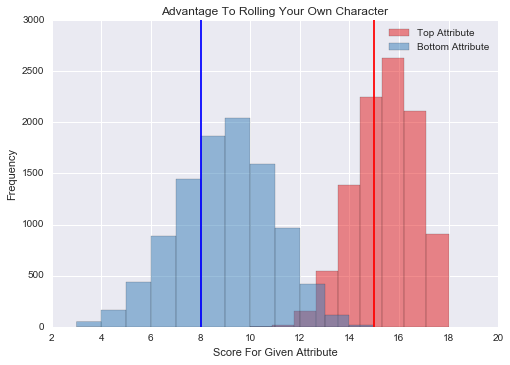

In [5]:
from matplotlib import pyplot

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

c1, c2, c3, c4, c5, c6 = sns.color_palette("Set1", 6)

pyplot.title('Advantage To Rolling Your Own Character')

pyplot.plot((15, 15), (0, 3000), 'k-', color='red')
pyplot.plot((8, 8), (0, 3000), 'k-', color='blue')

sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (10, 8)})

pyplot.hist(X.top, bins = 9, alpha=0.5, color = c1, label='Top Attribute')
pyplot.hist(X.bottom, bins = 12, alpha=0.5, color = c2, label='Bottom Attribute')
pyplot.ylabel("Frequency")
pyplot.xlabel("Score For Given Attribute")
pyplot.legend(loc='upper right')
pyplot.show()

Above the blue line indicates the lowest pre-generated score, 8, as projected over a histogram with the lowest attribute, which has a median score of 9. 

Similarly, the red line indicates the highest pre-generated score, 15, as projected over a histogram with the highest attribute, which has a median score of 16. 

However, this advantage is less pronounced in the 'middle' attributes

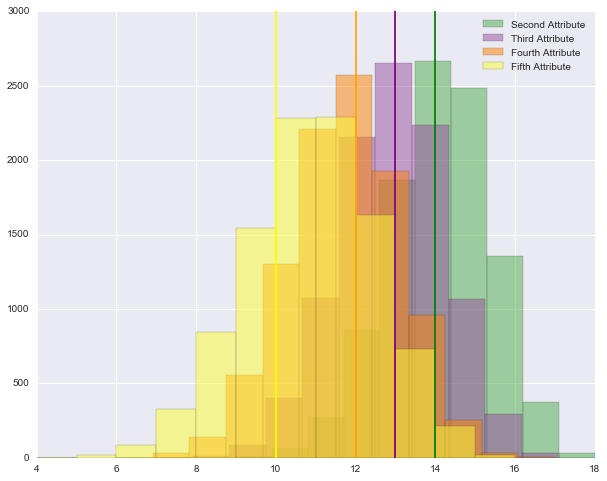

In [38]:
traits=[15,14,13,12,10,8]

pyplot.plot((14, 14), (0, 3000), 'k-', color='green')
pyplot.plot((13, 13), (0, 3000), 'k-', color='purple')
pyplot.plot((12, 12), (0, 3000), 'k-', color='orange')
pyplot.plot((10, 10), (0, 3000), 'k-', color='yellow')

pyplot.hist(X.second, bins = 10, alpha=0.5, color = c3, label='Second Attribute')
pyplot.hist(X.third, bins = 12, alpha=0.5, color = c4, label='Third Attribute')
pyplot.hist(X.fourth, bins = 12, alpha=0.5, color = c5, label='Fourth Attribute')
pyplot.hist(X.fifth, bins = 12, alpha=0.5, color = c6, label='Fifth Attribute')

pyplot.legend(loc='upper right')
pyplot.show()

### Medians for rolling your own character

In [7]:
import numpy as np

print np.median(X.top)
print np.median(X.second)
print np.median(X.third)
print np.median(X.fourth)
print np.median(X.fifth)
print np.median(X.bottom)

16.0
14.0
13.0
12.0
10.0
9.0


### Means for rolling your own character

In [39]:

print np.mean(X.top)
print np.mean(X.second)
print np.mean(X.third)
print np.mean(X.fourth)
print np.mean(X.fifth)
print np.mean(X.bottom)

15.6556
14.1753
12.9467
11.7512
10.3978
8.5029


## creating a dataframe with probabilities

In [40]:
import numpy
import pandas as pd

first = np.unique(X.top, return_counts=True)[1]
i1=np.unique(X.top, return_counts=True)[0]

second = np.unique(X.second, return_counts=True)[1]
i2=np.unique(X.second, return_counts=True)[0]

third = np.unique(X.third, return_counts=True)[1]
i3=np.unique(X.third, return_counts=True)[0]

fourth = np.unique(X.fourth, return_counts=True)[1]
i4=np.unique(X.fourth, return_counts=True)[0]

fifth = np.unique(X.fifth, return_counts=True)[1]
i5=np.unique(X.fifth, return_counts=True)[0]

sixth = np.unique(X.bottom, return_counts=True)[1]
i6=np.unique(X.bottom, return_counts=True)[0]

df = pd.DataFrame(index=range(3,21))

df = df.join(pd.DataFrame({'first':first}, index=i1))
df = df.join(pd.DataFrame({'second':second}, index=i2))
df = df.join(pd.DataFrame({'third':third}, index=i3))
df = df.join(pd.DataFrame({'fourth':fourth}, index=i4))
df = df.join(pd.DataFrame({'fifth':fifth}, index=i5))
df = df.join(pd.DataFrame({'sixth':sixth}, index=i6))

df = df.fillna(0)

df = df/10000

df['value'] = df.index.tolist()
order = df.columns.tolist()[:-1]

df

,first,second,third,fourth,fifth,sixth,value
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050,3
4,0.0000,0.0000,0.0000,0.0000,0.0004,0.0166,4
5,0.0000,0.0000,0.0000,0.0000,0.0022,0.0439,5
6,0.0000,0.0000,0.0000,0.0003,0.0088,0.0883,6
7,0.0000,0.0000,0.0002,0.0035,0.0328,0.1447,7
8,0.0000,0.0000,0.0013,0.0140,0.0845,0.1868,8
9,0.0000,0.0010,0.0083,0.0554,0.1544,0.2043,9
10,0.0005,0.0066,0.0401,0.1304,0.2286,0.1591,10
11,0.0016,0.0271,0.1071,0.2212,0.2292,0.0961,11
12,0.0155,0.0859,0.2154,0.2575,0.1632,0.0414,12


In [28]:
print traits
print order

[15, 14, 13, 12, 10, 8]
['first', 'second', 'third', 'fourth', 'fifth', 'sixth']


### Odds Ratios

But rolling your own character has risks too! You could roll super low, so these odds ratios will explain what your odds are for rolling the standard value or higher vs a lower value. 

So what are the odds for rolling the same or higher vs lower? 

In [50]:
Odds = []

Odds.append(df.ix[15:]['first'].sum()/ df.ix[:14]['first'].sum())
Odds.append(df.ix[14:]['second'].sum()/ df.ix[:13]['second'].sum())
Odds.append(df.ix[13:]['third'].sum()/ df.ix[:12]['third'].sum())
Odds.append(df.ix[12:]['fourth'].sum()/ df.ix[:11]['fourth'].sum())
Odds.append(df.ix[10:]['fifth'].sum()/ df.ix[:9]['fifth'].sum())
Odds.append(df.ix[8:]['sixth'].sum()/ df.ix[:7]['sixth'].sum())

pd.DataFrame({"Character Attribute":order, "Default Value":traits, "Odds of Better Roll": Odds})

,Character Attribute,Default Value,Odds of Better Roll
0,first,15,3.750594
1,second,14,2.252033
2,third,13,1.685285
3,fourth,12,1.354049
4,fifth,10,2.532321
5,sixth,8,2.350084


### SUMMARY

Overall, the advantages of rolling your own character are not homogenous and greatly depend on the character attribute we're examining. The greatest advantage is for the highest attribute, which is 3.75x more likely to be higher than the default (pre-fab) value. Although this advantage attenuates for the middle characteristics